In [8]:
# code10-1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 
RANDOM = 8
 
df = pd.read_csv('../datafiles/bike.tsv',sep="\t")
temp= pd.read_json("../datafiles/temp.json")
temp=temp.T
# weather = pd.read_csv("../datafiles/weather.csv", encoding='cp932')
# df2=df.merge(weather,how="inner",on="weather_id")
 
# df3 = df.merge(temp,how="left",on="dteday").dropna()
# 線形補完は.dropna()を行わない
df3 = df.merge(temp,how="left",on="dteday").dropna()
# 欠損値の線形補完
 
 
# データを学習とテストに分離
train,test = train_test_split(df3,test_size=0.2,random_state=RANDOM)
 
# 学習に使用する列を定義
columns = [
    "holiday",
    "weekday",
    "workingday",
    "weather_id",
    "atemp",
    "hum",
#      "temp",
    "windspeed"
    ]  
x = train.loc[:,columns ]
y = train[['cnt']]
 
model = LinearRegression()
model.fit(x,y) # 欠損値予測のためのモデルを予測
print('val:',model.score(x, y))
 
x_test = test.loc[:,columns].astype('float')
y_test = test[['cnt']]
print('test: ',model.score(x_test, y_test))

val: 0.49152163312455377
test:  0.4755768011951561


### 線形補完確認

In [9]:
# code10-1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 
RANDOM = 8
 
df = pd.read_csv('../datafiles/bike.tsv',sep="\t")
temp= pd.read_json("../datafiles/temp.json")
temp=temp.T
# weather = pd.read_csv("../datafiles/weather.csv", encoding='cp932')
# df2=df.merge(weather,how="inner",on="weather_id")
 
# df3 = df.merge(temp,how="left",on="dteday").dropna()
# 線形補完は.dropna()を行わない
df3 = df.merge(temp,how="left",on="dteday")
# 欠損値の線形補完
df3[df3.isnull().any(axis=1)]

,dteday,holiday,weekday,workingday,weather_id,cnt,atemp,hum,temp,windspeed
200,2011-07-20,0,3,1,1,4332,NaN,NaN,NaN,NaN
202,2011-07-22,0,5,1,1,3387,None,0.580417,0.848333,0.1331
700,2012-12-01,0,6,0,2,5191,None,0.806667,0.298333,0.059704


In [10]:
# 欠損値の線形補完
inter_col = ["atemp","hum","temp","windspeed"]
df3[inter_col] = df3[inter_col].astype(float)
df3[inter_col] = df3[inter_col].interpolate()
df3.loc[199:203]

,dteday,holiday,weekday,workingday,weather_id,cnt,atemp,hum,temp,windspeed
199,2011-07-19,0,2,1,1,4541,0.747479,0.650417,0.776667,0.130600
200,2011-07-20,0,3,1,1,4332,0.786925,0.670834,0.795834,0.176310
201,2011-07-21,0,4,1,2,3784,0.826371,0.691250,0.815000,0.222021
202,2011-07-22,0,5,1,1,3387,0.815329,0.580417,0.848333,0.133100
203,2011-07-23,0,6,0,1,3285,0.804287,0.500000,0.849167,0.131221


In [11]:
df3.loc[700:701]

,dteday,holiday,weekday,workingday,weather_id,cnt,atemp,hum,temp,windspeed
700,2012-12-01,0,6,0,2,5191,0.341537,0.806667,0.298333,0.059704
701,2012-12-02,0,0,0,2,4649,0.359208,0.823333,0.347500,0.124379


In [12]:
train.corr(numeric_only=True)['cnt'].map(abs).sort_values(ascending = False)

cnt           1.000000
weather_id    0.263064
weekday       0.068357
workingday    0.056619
holiday       0.053977
Name: cnt, dtype: float64

In [3]:
# code10-1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 
RANDOM = 8
 
df = pd.read_csv('../datafiles/bike.tsv',sep="\t")
temp= pd.read_json("../datafiles/temp.json")
temp=temp.T
# weather = pd.read_csv("../datafiles/weather.csv", encoding='cp932')
# df2=df.merge(weather,how="inner",on="weather_id")
 
df3 = df.merge(temp,how="left",on="dteday")
 
# 欠損値の線形補完
inter_col = ["atemp","hum","temp","windspeed"]
df3[inter_col] = df3[inter_col].astype(float)
df3[inter_col] = df3[inter_col].interpolate()
 
# データを学習とテストに分離
train,test = train_test_split(df3,test_size=0.2,random_state=RANDOM)
 
# 学習に使用する列を定義
columns = [
    "holiday",
    "weekday",
    "workingday",
    "weather_id",
    "atemp",
    "hum",
#     "temp",
    "windspeed"
    ]  
x = train.loc[:,columns ].astype('float')
# x2 多項式特徴量
x['atemp2'] = x['atemp']*x['atemp']
x['weather_id2'] = x['weather_id']*x['weather_id']
x['windspeed2'] = x['windspeed']*x['windspeed']
# x3 多項式特徴量
x['atemp3'] = x['atemp']*x['atemp']*x['atemp']
x['weather_id3'] = x['weather_id']*x['weather_id']*x['weather_id']
x['windspeed3'] = x['windspeed']*x['windspeed']*x['windspeed']
y = train[['cnt']]
 
# x_train, x_val, y_train, y_val = train_test_split(x, t,
#     test_size = 0.2, random_state = RANDOM)
 
model = LinearRegression()
model.fit(x,y) # 欠損値予測のためのモデルを予測
print('val:',model.score(x, y))
 
x_test = test.loc[:,columns].astype('float')
# 多項式特徴量
x_test['atemp2'] = x_test['atemp']*x_test['atemp']
x_test['weather_id2'] = x_test['weather_id']*x_test['weather_id']
x_test['windspeed2'] = x_test['windspeed']*x_test['windspeed']
# 多項式特徴量
x_test['atemp3'] = x_test['atemp']*x_test['atemp']*x_test['atemp']
x_test['weather_id3'] = x_test['weather_id']*x_test['weather_id']*x_test['weather_id']
x_test['windspeed3'] = x_test['windspeed']*x_test['windspeed']*x_test['windspeed']
y_test = test[['cnt']]
print('test: ',model.score(x_test, y_test))

val: 0.5962474018995187
test:  0.5638451818202515


In [ ]:
val: 0.5962474018995187
test:  0.5638451818202512

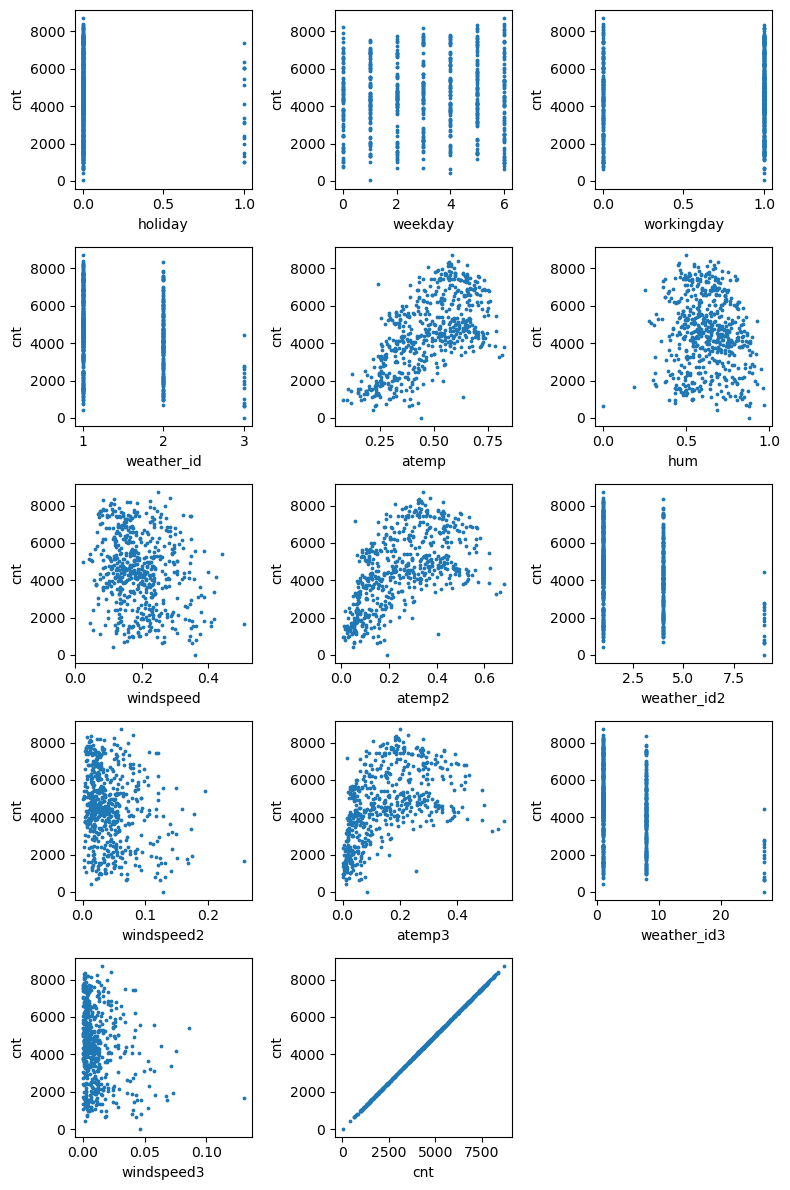

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,12))
X = pd.concat([x,y],axis=1)
colname = X.columns

for n, col in enumerate(colname):
    X.plot(ax=fig.add_subplot(5,3,n+1), kind='scatter', x= col, y='cnt', s=3)
    
plt.tight_layout()
plt.show()